## Electric Vehicle Population Data
- This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
- Sources: [**https://catalog.data.gov/dataset/electric-vehicle-population-data**](https://catalog.data.gov/dataset/electric-vehicle-population-data)
- Variables:
    - Location (County, City, State, Postal Code)
    - Vehicle (Make, Model, EV Type, etc.)
- I find this dataset interesting because I want to observe the advancements in EV technology and the effectiveness of the trend in Washington State.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
file_path = 'data/Electric_Vehicle_Population_Data.csv'
e_vehicle_df = pd.read_csv(file_path)

# Print data
e_vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
# Display how many rows and columns in this dataset
e_vehicle_df.shape

(138421, 17)

In [4]:
# Check null values
e_vehicle_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 359
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      6
dtype: int64

In [5]:
# Cleaning dataset by dropping null values
clean_e_vehicle_df = e_vehicle_df.dropna()

In [6]:
# Verify the data after cleaning
clean_e_vehicle_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### Part 1: Line Charts

- **Objective:** Visualize a trend within your dataset
- **Task:** Create a line chart and explain the trend you've observed. Discuss any patterns, anomalies, or insights derived from this visualization.

/var/folders/9y/yt58dg190ss7v19zqz7r1mgr0000gn/T/ipykernel_6502/2011386067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_e_vehicle_df.loc[:, 'Year'] = clean_e_vehicle_df['Model Year'].dt.year


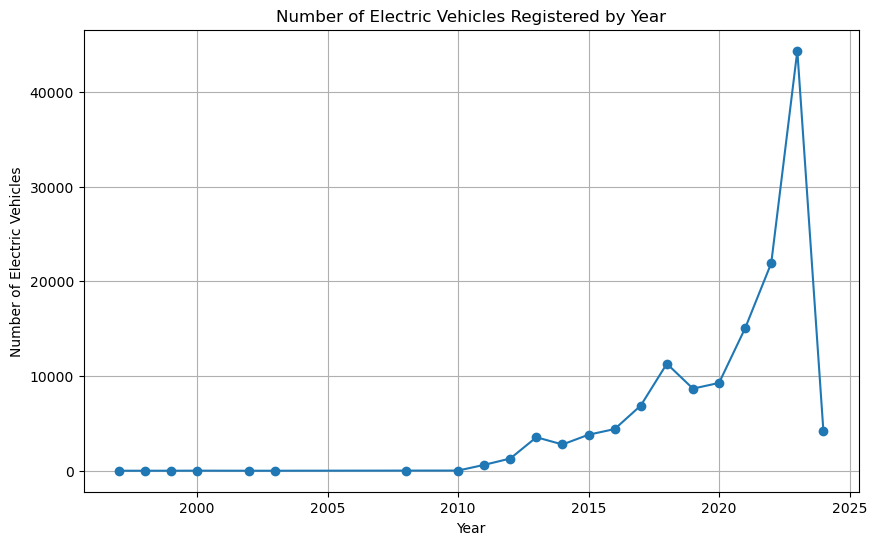

In [7]:
# Create a line chart
# Convert 'Model Year' to datetime format
clean_e_vehicle_df.loc[:, 'Model Year'] = pd.to_datetime(clean_e_vehicle_df['Model Year'], format='%Y')

# Extract the year from the datetime object
clean_e_vehicle_df.loc[:, 'Year'] = clean_e_vehicle_df['Model Year'].dt.year

# Group the data by 'Year' and count the number of electric vehicles for each year
ev_count_by_year = clean_e_vehicle_df.groupby('Year').size()


# Create a line chart to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(ev_count_by_year.index, ev_count_by_year.values, marker='o')
plt.title('Number of Electric Vehicles Registered by Year')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.grid(True)
plt.show()

- This visualization provides insights into the trend of electric vehicle adoption over the years, highlighting a significant increase in registrations starting from around 2013. 
- This trend aligns with the global shift towards sustainable transportation and the increasing popularity of electric vehicles manufacturers like Tesla, Chevrolet, etc.

### Part 2: Bar Charts

- **Objective:** Compare different categories or groups within your dataset.
- **Task:** Generate a bar chart to illustrate these comparisons. Analyze the results and explain any significant findings.

        Tesla     BMW  Toyota
Year                         
2002      0.0     0.0     1.0
2003      0.0     0.0     1.0
2008     14.0     0.0     0.0
2010     16.0     0.0     0.0
2011      6.0     0.0     0.0
2012     99.0     0.0   304.0
2013    579.0     0.0   220.0
2014    498.0   345.0   164.0
2015    848.0   314.0    76.0
2016   1244.0   297.0     0.0
2017   1287.0   524.0   746.0
2018   6211.0   550.0   529.0
2019   3710.0   266.0   174.0
2020   5619.0   145.0   275.0
2021   8699.0   517.0   856.0
2022  10869.0   740.0   453.0
2023  21919.0  1311.0   772.0
2024      0.0   849.0   212.0


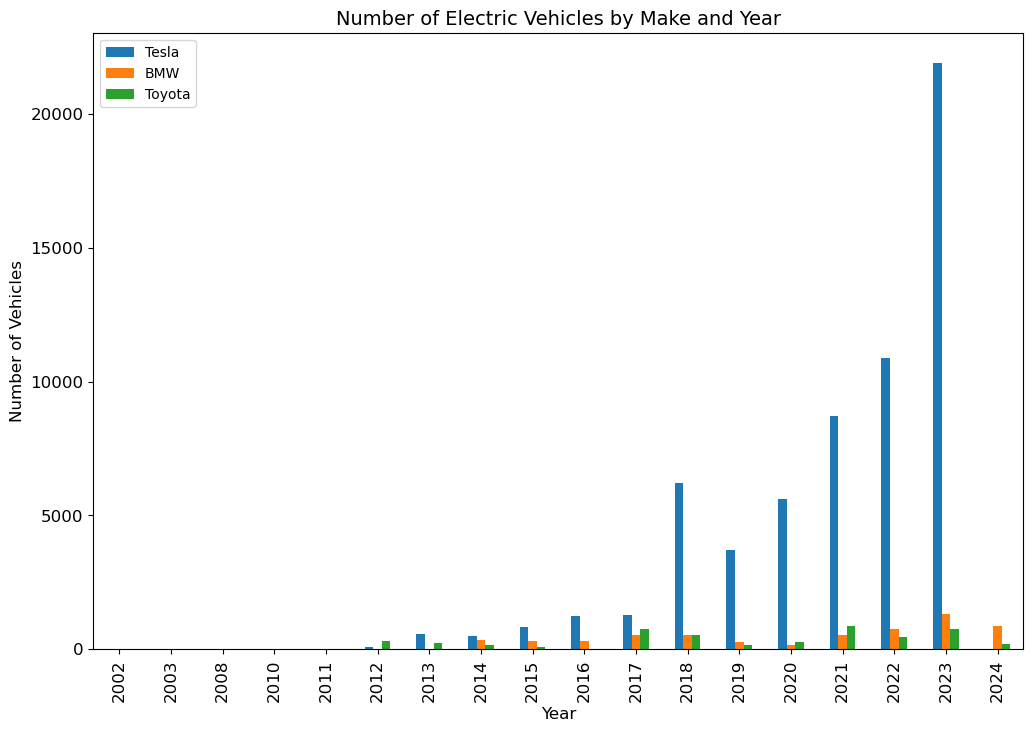

In [8]:
# Generate a bar chart
# Tesla and BWM dataframe
tesla_df = clean_e_vehicle_df[clean_e_vehicle_df['Make'] == 'TESLA']
bmw_df = clean_e_vehicle_df[clean_e_vehicle_df['Make'] == 'BMW']
toyota_df = clean_e_vehicle_df[clean_e_vehicle_df['Make'] == 'TOYOTA']

# Count number of vehicle each brand
tesla_count = tesla_df.groupby('Year').size()
bmw_count = bmw_df.groupby('Year').size()
toyota_count = toyota_df.groupby('Year').size()

combined_count_df = pd.concat([tesla_count, bmw_count, toyota_count], axis=1).fillna(0).sort_values(by='Year')
combined_count_df.columns = ['Tesla', 'BMW', 'Toyota']
print(combined_count_df)

# Plot the DataFrame as a bar chart
combined_count_df.plot(kind='bar', figsize=(12, 8), legend=True, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.title('Number of Electric Vehicles by Make and Year', fontsize=14)
plt.show()

### Analyze the results and explain any significant findings
The table shows the number of Tesla, BMW, and Toyota electric vehicles registered each year from 2002 to 2024. One significant finding is the rapid growth in Tesla registrations starting from 2012 and peaking in 2023. This growth is accompanied by a gradual increase in BMW registrations, albeit at a slower pace. Toyota, on the other hand, showed a fluctuating trend with periods of increased registrations followed by periods of decline. 

### Part 3: Heatmaps

- **Objective:** Explore correlations or relationships between different variables in your dataset.
- **Task:** Create a heatmap to visualize these relationships. Discuss any strong correlations and their potential implications.

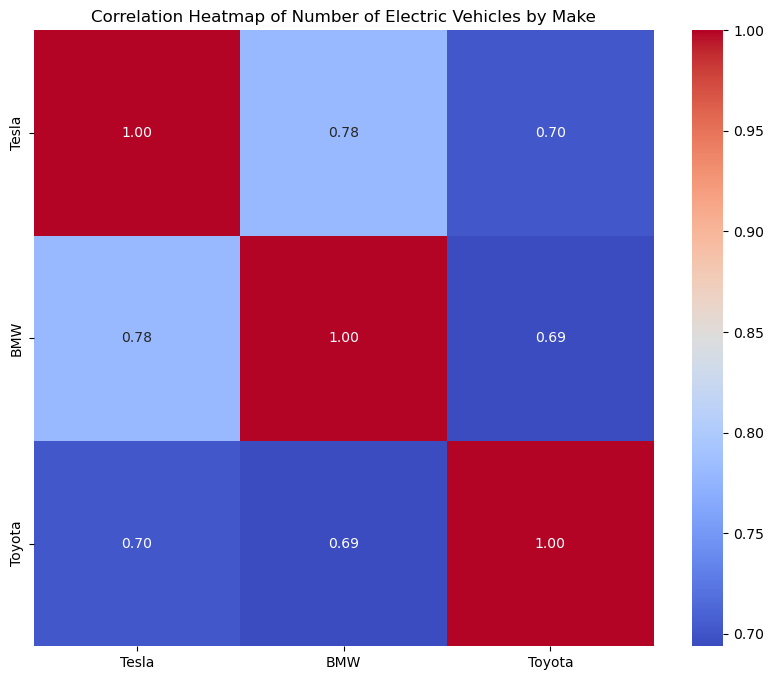

Strongest correlation between makes:  Tesla  BMW    0.779999
dtype: float64
Weakest correlation between makes:  BMW  Toyota    0.693845
dtype: float64


In [9]:
# Correlation matrix
corr_matrix = combined_count_df.corr(method='pearson').abs()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Number of Electric Vehicles by Make')
plt.show()

# Strongest correlation
# Find the pairs of makes that have the strongest correlation
strongest_corr = corr_matrix[corr_matrix != 1].unstack().sort_values(ascending=False).drop_duplicates()
print("Strongest correlation between makes: ", strongest_corr.head(1))

# Weakest correlation
# Find the pairs of makes that have the weakest correlation
weakest_corr = corr_matrix.unstack().sort_values().drop_duplicates()
print("Weakest correlation between makes: ", weakest_corr.head(1))


### Discuss any strong correlations and their potential implications.
A correlation coefficient of 0.779999 indicates a strong positive relationship between the number of Tesla and BMW vehicles registered each year. This means that as the number of Tesla vehicles registered increases, the number of BMW vehicles registered tends to also increase. This strong positive correlation suggests that there may be underlying factors, such as market demand, consumer preferences, or economic conditions, that are influencing the registrations of both Tesla and BMW vehicles in a similar manner.

### Part 4: Scatter Plots

- **Objective:** Investigate the relationship between two quantitative variables in your dataset.
- **Task:** Produce a scatter plot and analyze any trends or patterns. Hypothesize about the underlying causes of these observations.

<Axes: xlabel='Model Year', ylabel='Electric Range'>

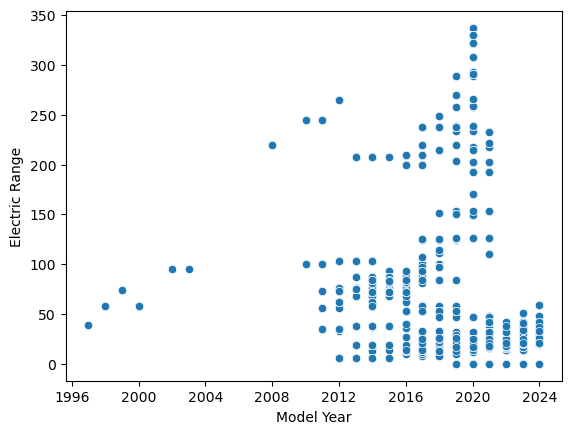

In [10]:
# Create scatter plots
sns.scatterplot(x=clean_e_vehicle_df['Model Year'], y=clean_e_vehicle_df['Electric Range'])

### Hypothesize about the underlying causes of these observations.
This trend shows a notable rise in the use of electric vehicles' electric range between 2016 and 2023. There may be various reasons behind this increase, such as advancements in electric vehicle technology, greater availability of electric vehicle models, and a growing consciousness of environmental concerns and the advantages of electric vehicles.